<a href="https://colab.research.google.com/github/nissi00/machine-learning/blob/main/nlporacle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DeepTweets**
### *Oracle competition from kaggle*




the objective of this challenge is to classify tweets according to two categories: sports or politics.

# loading dataset

In [9]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn import metrics



In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#Loading data
data = pd.read_csv("/content/drive/MyDrive/deeptweets/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/deeptweets/test.csv")

In [12]:
data=data.drop("TweetId", axis=1)

In [ ]:
data.info()

In [14]:
data.head()

,Label,TweetText
0,Politics,'#SecKerry: The value of the @StateDept and @U...
1,Politics,'@rraina1481 I fear so'
2,Sports,'Watch video highlights of the #wwc13 final be...
3,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,Sports,'@cricketfox Always a good thing. Thanks for t...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('TweetText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Label')):
  _plot_series(series, series_name, i)
  fig.legend(title='Label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TweetText')):
  _plot_series(series, series_name, i)
  fig.legend(title='TweetText', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['TweetText'].value_counts()
    for x_label, grp in _df_6.groupby('Label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Label')
_ = plt.ylabel('TweetText')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='Label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['TweetText'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='TweetText', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#**Data Exploration**

<ipython-input-15-760381adb2b0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["Label"], palette= cols)


Text(0, 0.5, 'Number of Data points')

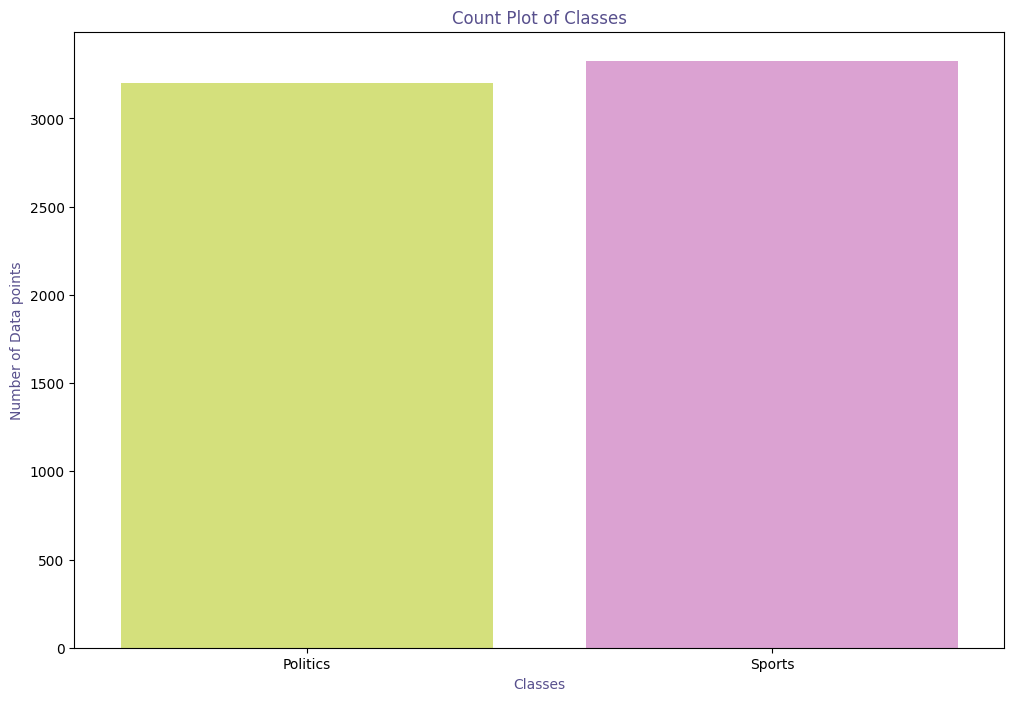

In [15]:
#Palette
cols= ["#E1F16B", "#E598D8"]
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Label"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

# **Feature engineering**

In [16]:
# word count

data['word count'] = data['TweetText'].apply(lambda x: len(str(x).split()))
test_data['word count'] = test_data['TweetText'].apply(lambda x: len(str(x).split()))

In [17]:
# stop word count
from wordcloud import STOPWORDS
data['stop word count'] = data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test_data['stop word count'] = test_data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [18]:
# unique word count
data['unique word count'] = data['TweetText'].apply(lambda x: len(set(str(x).split())))
test_data['unique word count'] = test_data['TweetText'].apply(lambda x: len(set(str(x).split())))

In [19]:
# url count
data['url count'] =data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test_data['url count'] = test_data['TweetText'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

In [20]:
# char count
data['char count'] = data['TweetText'].apply(lambda y: len(str(y)))
test_data['char count'] = test_data['TweetText'].apply(lambda y: len(str(y)))


In [21]:
# hashtag count
data['hashtag count'] = data['TweetText'].apply(lambda y: len([c for c in str(y) if c == '#']))
test_data['hashtag count'] = test_data['TweetText'].apply(lambda y: len([c for c in str(y) if c == '#']))

In [22]:
# punctuation count
import string
data['punctuation count'] = data['TweetText'].apply(lambda y: len([c for c in str(y) if c in string.punctuation]))
test_data['punctuation count'] = test_data['TweetText'].apply(lambda y: len([c for c in str(y) if c in string.punctuation]))

In [23]:
# mention count
data['mention count'] = data['TweetText'].apply(lambda y: len([c for c in str(y) if c == '@']))
test_data['mention count'] = test_data['TweetText'].apply(lambda y: len([c for c in str(y) if c == '@']))

In [24]:
data.head()

,Label,TweetText,word count,stop word count,unique word count,url count,char count,hashtag count,punctuation count,mention count
0,Politics,'#SecKerry: The value of the @StateDept and @U...,21,11,19,0,125,1,9,2
1,Politics,'@rraina1481 I fear so',4,1,4,0,23,0,3,1
2,Sports,'Watch video highlights of the #wwc13 final be...,14,5,14,1,102,1,8,0
3,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,12,2,12,0,121,3,10,3
4,Sports,'@cricketfox Always a good thing. Thanks for t...,10,3,10,0,62,0,7,1


# outliers detection

<Figure size 1200x800 with 0 Axes>

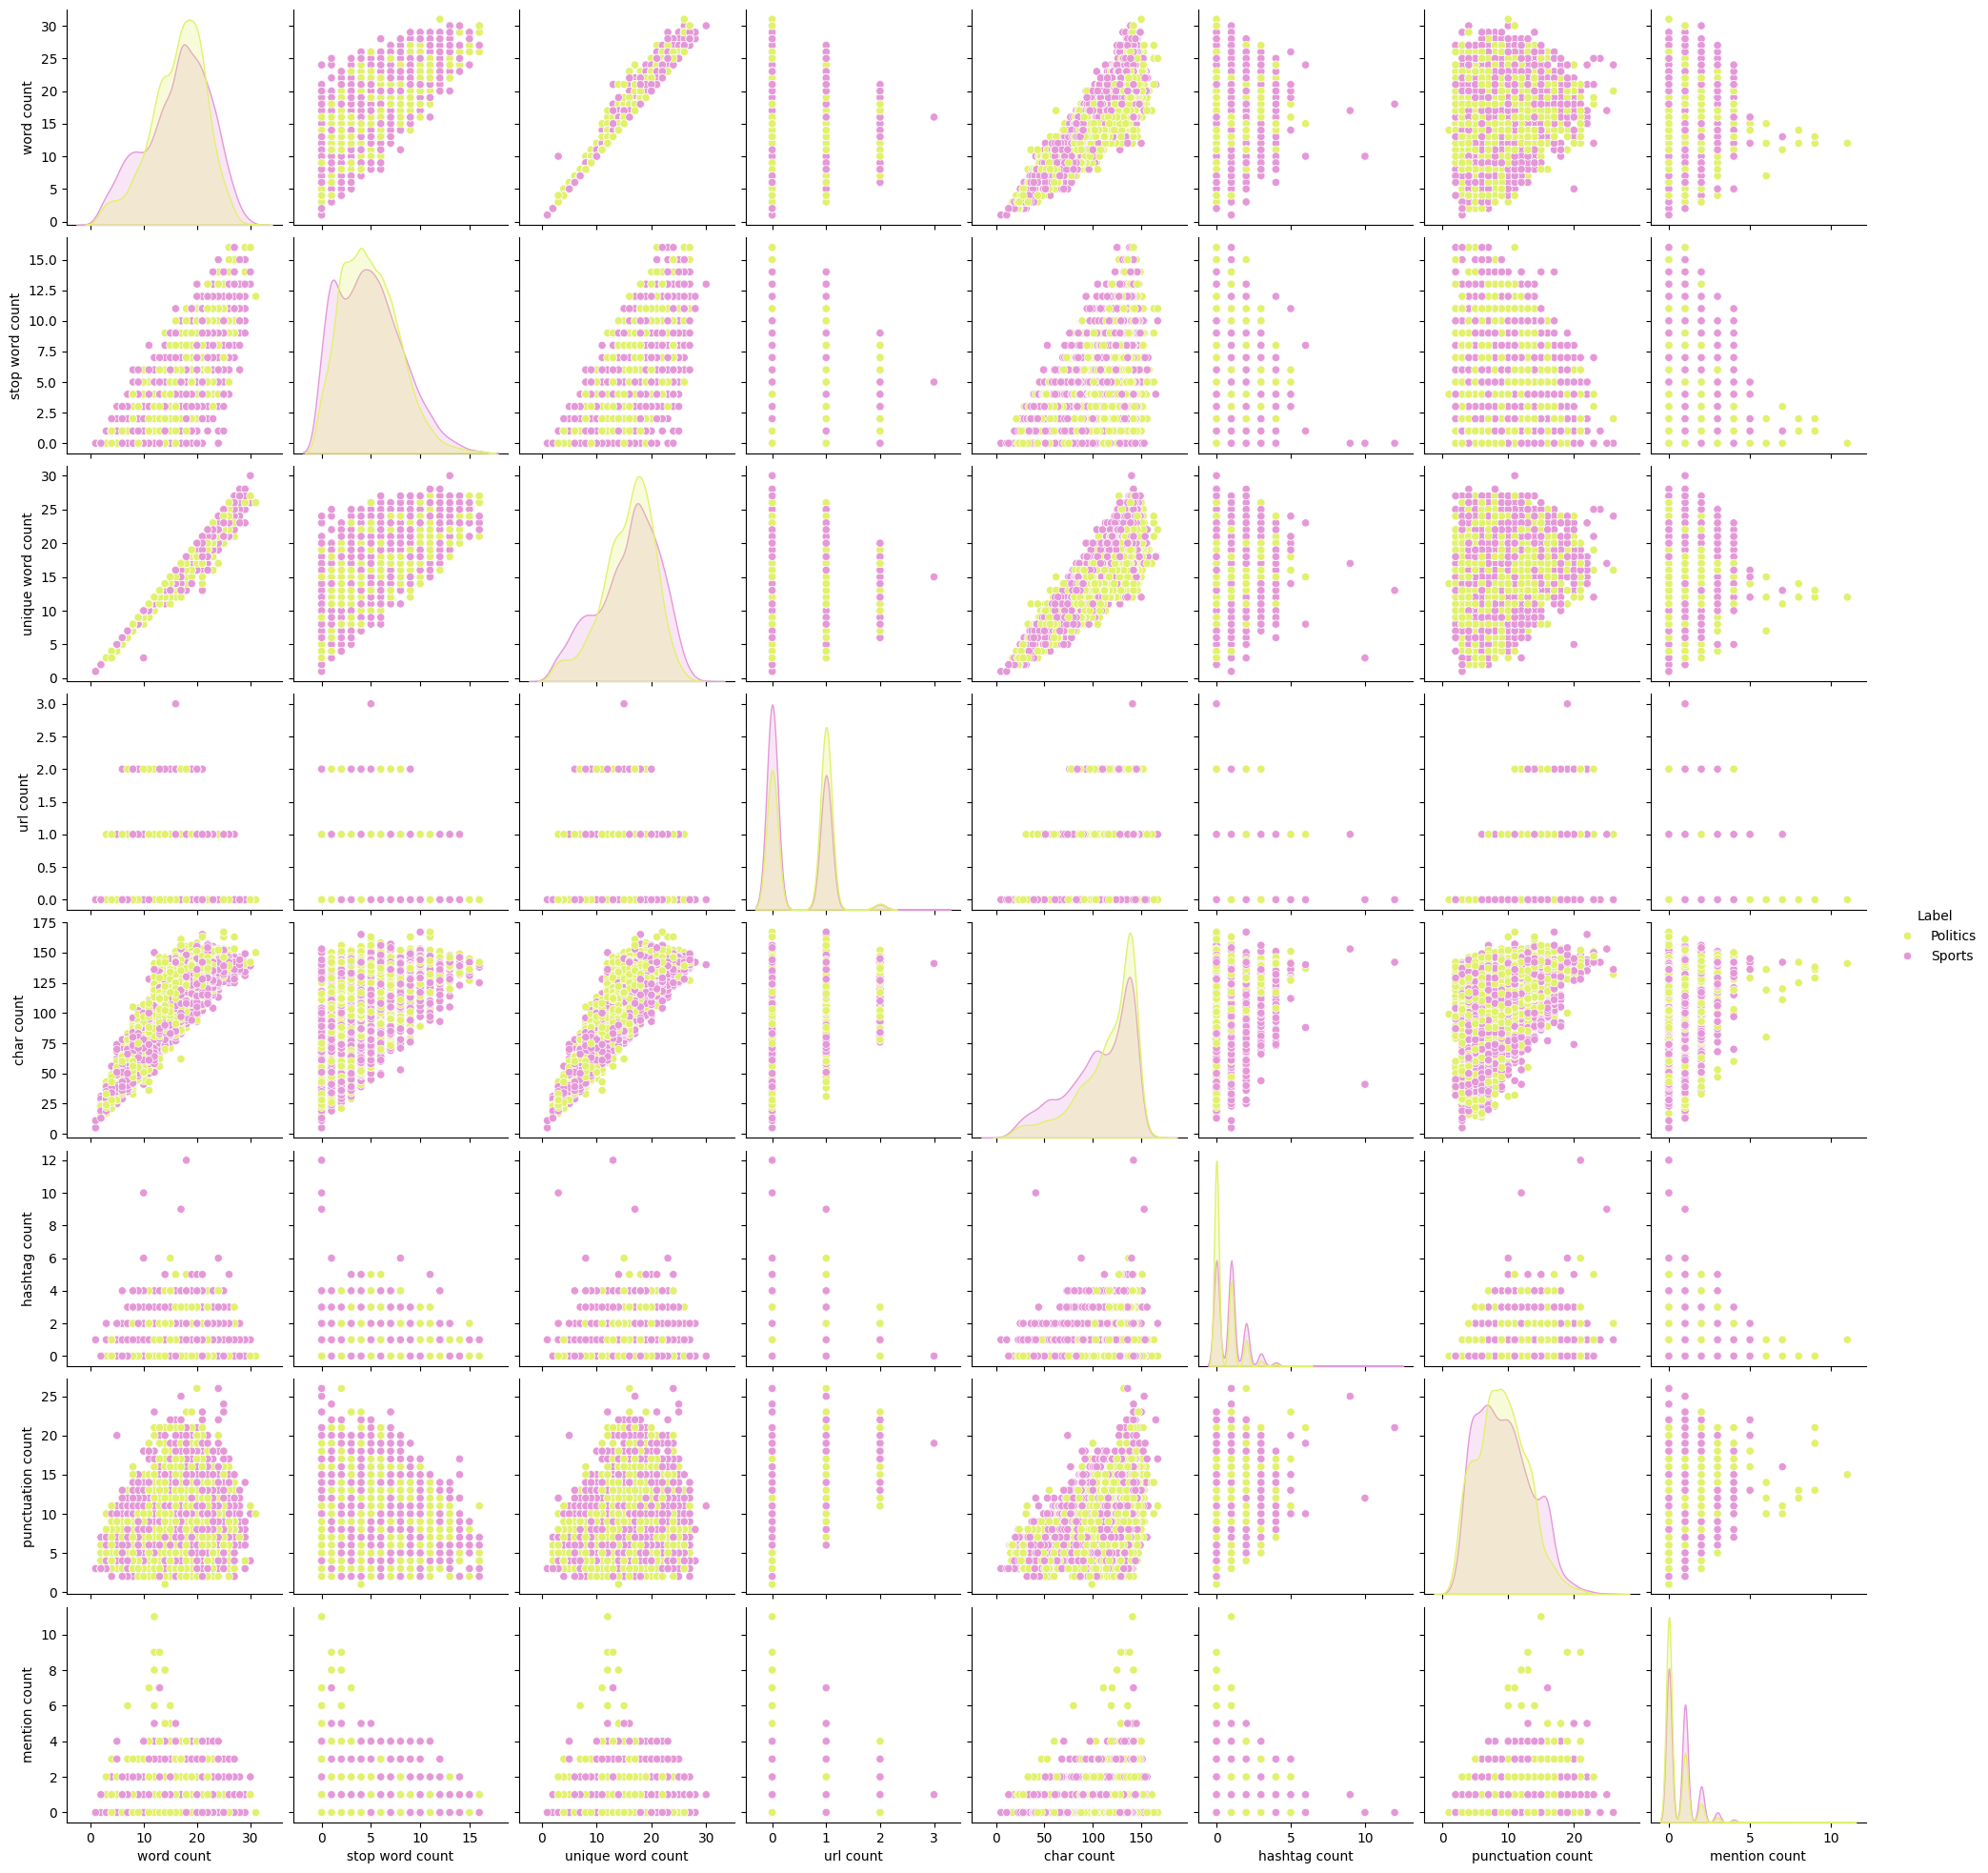

In [25]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Label",palette=cols)
plt.show(fg)

# Data preprocessing

### cleaning text

In [26]:
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["TweetText"][:5], sep = "\n")

 The First 5 Texts:
'#SecKerry: The value of the @StateDept and @USAID is measured, not in dollars, but in terms of our deepest American values.'
'@rraina1481 I fear so'
'Watch video highlights of the #wwc13 final between Australia and West Indies at http://t.co/lBXIIk3j'
'RT @chelscanlan: At Nitro Circus at #AlbertPark ! #theymakeitlooksoeasy @ausgrandprix @ChadwickModels #CantWaitForAusGP'
'@cricketfox Always a good thing. Thanks for the feedback :-)'


In [27]:
def Clean(Text):
    text_traite = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    text_traite = text_traite.lower() #converting to lowecase
    text_traite = text_traite.split()
    text_traite = ' '.join(text_traite)
    return text_traite

In [ ]:
data["Clean_Text"] = data["TweetText"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m",*data["Clean_Text"][:10], sep = "\n")

In [29]:
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m",*data["Tokenize_Text"][:5], sep = "\n")


 The First 5 Texts after Tokenizing:
['seckerry', 'the', 'value', 'of', 'the', 'statedept', 'and', 'usaid', 'is', 'measured', 'not', 'in', 'dollars', 'but', 'in', 'terms', 'of', 'our', 'deepest', 'american', 'values']
['rraina', 'i', 'fear', 'so']
['watch', 'video', 'highlights', 'of', 'the', 'wwc', 'final', 'between', 'australia', 'and', 'west', 'indies', 'at', 'http', 't', 'co', 'lbxiik', 'j']
['rt', 'chelscanlan', 'at', 'nitro', 'circus', 'at', 'albertpark', 'theymakeitlooksoeasy', 'ausgrandprix', 'chadwickmodels', 'cantwaitforausgp']
['cricketfox', 'always', 'a', 'good', 'thing', 'thanks', 'for', 'the', 'feedback']


### Removing stowords

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")


 The First 5 Texts after removing the stopwords:
['seckerry', 'value', 'statedept', 'usaid', 'measured', 'dollars', 'terms', 'deepest', 'american', 'values']
['rraina', 'fear']
['watch', 'video', 'highlights', 'wwc', 'final', 'australia', 'west', 'indies', 'http', 'co', 'lbxiik', 'j']
['rt', 'chelscanlan', 'nitro', 'circus', 'albertpark', 'theymakeitlooksoeasy', 'ausgrandprix', 'chadwickmodels', 'cantwaitforausgp']
['cricketfox', 'always', 'good', 'thing', 'thanks', 'feedback']


In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['seckerry', 'value', 'statedept', 'usaid', 'measure', 'dollars', 'term', 'deepest', 'american', 'value']
['rraina', 'fear']
['watch', 'video', 'highlight', 'wwc', 'final', 'australia', 'west', 'indies', 'http', 'co', 'lbxiik', 'j']
['rt', 'chelscanlan', 'nitro', 'circus', 'albertpark', 'theymakeitlooksoeasy', 'ausgrandprix', 'chadwickmodels', 'cantwaitforausgp']
['cricketfox', 'always', 'good', 'thing', 'thank', 'feedback']


# Vetorization

In [34]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")


 The First 5 lines in corpus :
seckerry value statedept usaid measure dollars term deepest american value
rraina fear
watch video highlight wwc final australia west indies http co lbxiik j
rt chelscanlan nitro circus albertpark theymakeitlooksoeasy ausgrandprix chadwickmodels cantwaitforausgp
cricketfox always good thing thank feedback


In [35]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
X.dtype

dtype('float64')

In [36]:
label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["Label"])

# Model building

In [37]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = data["Label"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
svm_model=SVC()
nb_model=MultinomialNB()
knn_model=KNeighborsClassifier()
rf_model=RandomForestClassifier()
df_model=DecisionTreeClassifier()
lst_model=[svm_model,nb_model,knn_model,rf_model,df_model]
# importation dess modèles pour une étude comparatif

In [40]:
# entrainement avec différents algorithmes suivi d'un rapport de classification
from sklearn.metrics import confusion_matrix,classification_report
for i in lst_model:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print("********************************************************************************")
  print(classification_report(y_test,y_pred))
  print("********************************************************************************")

SVC()
********************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       638
           1       0.95      0.97      0.96       667

    accuracy                           0.96      1305
   macro avg       0.96      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305

********************************************************************************
MultinomialNB()
********************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       638
           1       0.96      0.97      0.97       667

    accuracy                           0.96      1305
   macro avg       0.97      0.96      0.96      1305
weighted avg       0.96      0.96      0.96      1305

********************************************************************************


In [41]:
for i in lst_model:
  if i != svm_model:
     print(i)
     re=i.predict(tfidf.transform(["'@cricketfox Always a good thing. Thanks for the feedback :-)'"]))
     re = label_encoder.inverse_transform(re)
     print(re)

MultinomialNB()
['Sports']
KNeighborsClassifier()
['Sports']
RandomForestClassifier()
['Sports']
DecisionTreeClassifier()
['Sports']


In [ ]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}
# Cossvalidation
for i, model in enumerate(lst_model):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

In [ ]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)

    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)

In [ ]:
cmap = ListedColormap(["#E1F16B", "#E598D8"])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls,
                          X_test,
                          y_test,
                          ax=ax,
                          cmap= cmap,
                          )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()
